<a href="https://colab.research.google.com/github/Abhiishek11/FractureDetectionusingRADTorch/blob/main/RadTorch_NN_and_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://download.radtorch.com/ -q

     |████████████████████████████████| 1.9MB 7.0MB/s 


In [ ]:
from radtorch import pipeline, core
from radtorch.settings import *
import os

In [ ]:
data_root = os.path.join(r'/content/drive/MyDrive/Colab Notebooks/train_image_paths.csv')

In [ ]:
x = pd.read_csv(data_root, header=None, names=['PATH'])
x

,PATH
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
...,...
36803,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36804,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36805,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...
36806,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...


In [ ]:
shoulder_files = []
shoulder_labels = []
for i, r in x.iterrows():
    if 'SHOULDER' in r['PATH']:
        shoulder_files.append('/content/drive/MyDrive/Colab Notebooks/'+r['PATH'])
        if 'positive' in r['PATH']:
            shoulder_labels.append('POSITIVE')
        else:
            shoulder_labels.append('NEGATIVE')

In [ ]:
shoulder_data = pd.DataFrame(zip(shoulder_files,shoulder_labels), columns=['PATH', 'LABEL'])
shoulder_data


,PATH,LABEL
0,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
1,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
2,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
3,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
4,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,POSITIVE
...,...,...
8374,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE
8375,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE
8376,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE
8377,/content/drive/MyDrive/Colab Notebooks/MURA-v1...,NEGATIVE


In [ ]:
clf = pipeline.Image_Classification(data_directory = '/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/train', 
                                    table=shoulder_data, 
                                    is_dicom=False,
                                    is_path=True,
                                    image_path_column='PATH', image_label_column='LABEL',
                                    sampling=0.5,
                                    model_arch='resnet50',
                                    type='xgboost',
                                    parameters={'tree_method':'gpu_hist'})

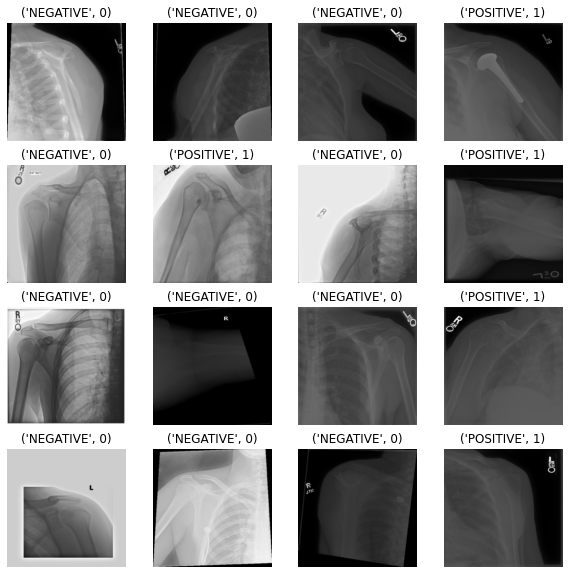

In [ ]:
clf.data_processor.sample()

In [ ]:
clf.run()

[01/01/2021 20:09:09]: Starting Image Classification Pipeline
[01/01/2021 20:09:09]: Random seed 100 set successfully
[01/01/2021 20:09:09]: Phase 1: Feature Extraction.
[01/01/2021 20:09:09]: Extracting Training Features
[01/01/2021 20:09:09]: Running Feature Extraction using resnet50 architecture with balance_class = False and normalize = ((0, 0, 0), (1, 1, 1)).



[01/01/2021 20:26:59]: Features extracted successfully.
[01/01/2021 20:26:59]: Extracting Testing Features
[01/01/2021 20:26:59]: Running Feature Extraction using resnet50 architecture with balance_class = False and normalize = ((0, 0, 0), (1, 1, 1)).



[01/01/2021 20:33:42]: Features extracted successfully.
[01/01/2021 20:33:42]: Phase 2: Classifier Training.
[01/01/2021 20:33:42]: Running Classifier Training.
[01/01/2021 20:33:42]: Training XGBClassifier with 5 split stratified cross validation.


[01/01/2021 20:33:45]: Split 0 Accuracy = 0.6500994035785288
[01/01/2021 20:33:48]: Split 1 Accuracy = 0.6918489065606361
[01/01/2021 20:33:50]: Split 2 Accuracy = 0.679920477137177
[01/01/2021 20:33:52]: Split 3 Accuracy = 0.679920477137177
[01/01/2021 20:33:55]: Split 4 Accuracy = 0.6713147410358565

[01/01/2021 20:33:55]: XGBClassifier model training finished successfully.
[01/01/2021 20:33:55]: XGBClassifier overall training accuracy: 0.67 (+/- 0.03)
[01/01/2021 20:33:55]: Classifier Training completed successfully.


In [ ]:
clf.classifier.roc()

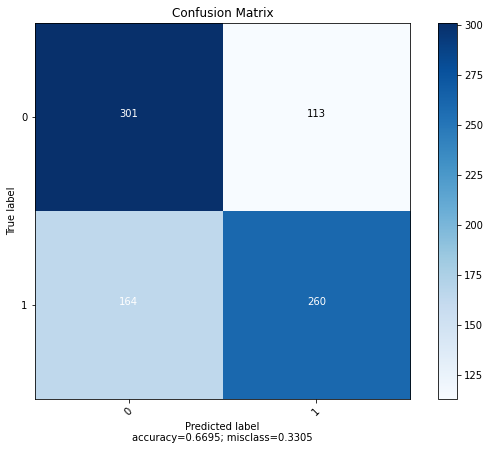

In [ ]:
clf.classifier.confusion_matrix()

In [ ]:
clf2 = pipeline.Image_Classification(data_directory = '/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/train', 
                                    table=shoulder_data, 
                                    is_dicom=False,
                                    is_path=True,
                                    image_path_column='PATH', image_label_column='LABEL',
                                    sampling=0.5,
                                    model_arch='resnet50',
                                    type='nn_classifier',
                                    epochs=5)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
clf2.run()

[01/02/2021 17:11:51]: Starting Image Classification Pipeline
[01/02/2021 17:11:51]: Random seed 100 set successfully
[01/02/2021 17:11:52]: Loss function selected is CrossEntropyLoss
[01/02/2021 17:11:52]: Optimizer selected is Adam
[01/02/2021 17:11:52]: Random seed 100 set successfully
[01/02/2021 17:11:52]: Starting training at 2021-01-02 17:11:52.009820


[01/02/2021 17:42:32]: Epoch : 000/5 : [Training: Loss: 0.5962, Accuracy: 69.5306%]  [Validation : Loss : 0.6267, Accuracy: 65.8711%] [Time: 1830.8173s]
[01/02/2021 17:43:33]: Epoch : 001/5 : [Training: Loss: 0.4654, Accuracy: 78.4407%]  [Validation : Loss : 0.5254, Accuracy: 71.8377%] [Time: 60.9248s]
[01/02/2021 17:44:34]: Epoch : 002/5 : [Training: Loss: 0.3529, Accuracy: 85.0438%]  [Validation : Loss : 0.5841, Accuracy: 74.2243%] [Time: 60.8499s]
[01/02/2021 17:45:35]: Epoch : 003/5 : [Training: Loss: 0.2712, Accuracy: 89.1408%]  [Validation : Loss : 0.6874, Accuracy: 73.8663%] [Time: 60.7966s]
[01/02/2021 17:46:36]: Epoch : 004/5 : [Training: Loss: 0.1991, Accuracy: 92.0843%]  [Validation : Loss : 0.7816, Accuracy: 72.7924%] [Time: 60.6603s]

[01/02/2021 17:46:36]: Total training time=0:34:44.016240
[01/02/2021 17:46:36]: Classifier Training completed successfully.


In [ ]:
clf2.classifier.roc()

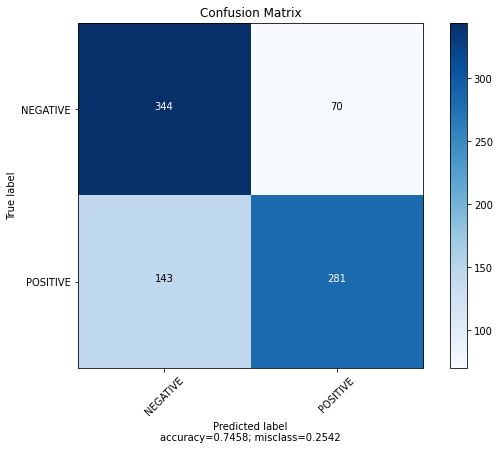

In [ ]:
clf2.classifier.confusion_matrix()

In [ ]:
target_image_path = clf2.data_processor.test_table.iloc[5]['PATH']
target_image_path

'/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/train/XR_SHOULDER/patient02659/study1_negative/image2.png'

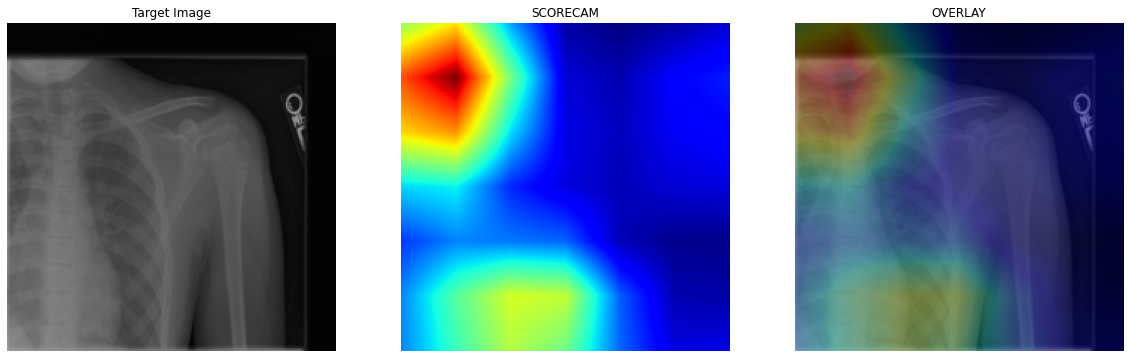

In [ ]:
clf2.cam(target_image_path=target_image_path, target_layer=clf2.trained_model.layer4[2].conv3, alpha=0.3, type='scorecam', figure_size=(20,60))

predicted class ids 1	 probability 0.7425716519355774


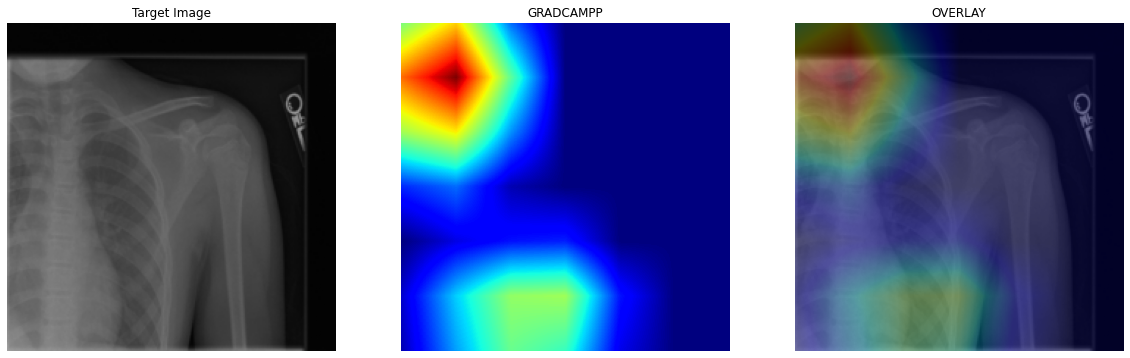

In [ ]:
clf2.cam(target_image_path=target_image_path, target_layer=clf2.trained_model.layer4[2].conv3, alpha=0.3, type='gradcampp', figure_size=(20,60))

In [ ]:
clf2.data_processor.class_table()

,Label,Label_idx
0,NEGATIVE,0
1,POSITIVE,1


In [ ]:
target_image_path_1 = clf2.data_processor.test_table.iloc[4]['PATH']
target_image_path_1

'/content/drive/MyDrive/Colab Notebooks/MURA-v1.1/train/XR_SHOULDER/patient01357/study1_positive/image1.png'

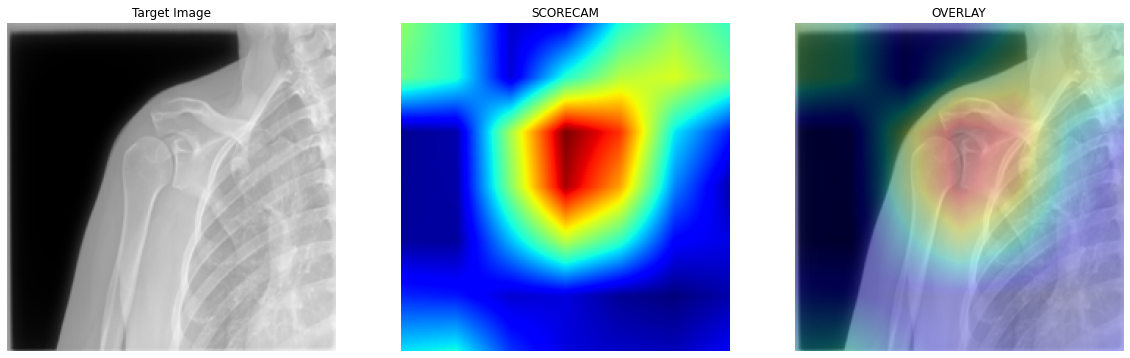

In [ ]:
clf2.cam(target_image_path=target_image_path_1, target_layer=clf2.trained_model.layer4[2].conv3, alpha=0.3, type='scorecam', figure_size=(20,60))

predicted class ids 0	 probability 0.9278585910797119


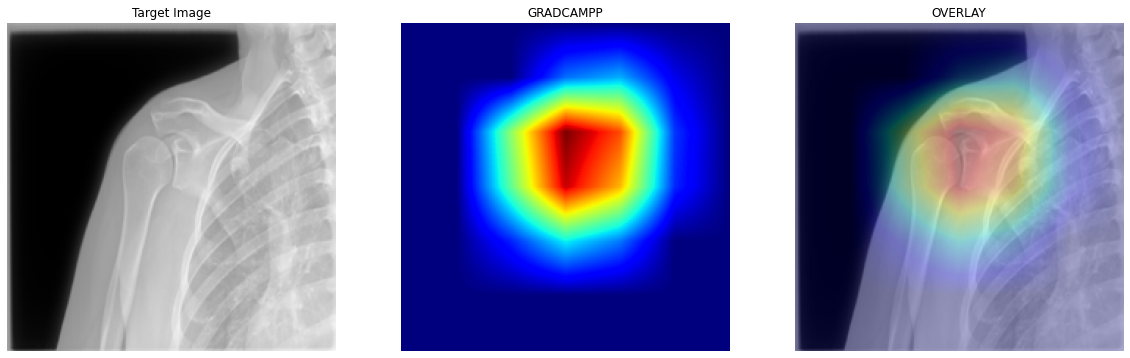

In [ ]:
clf2.cam(target_image_path=target_image_path_1, target_layer=clf2.trained_model.layer4[2].conv3, alpha=0.3, type='gradcampp', figure_size=(20,60))

In [ ]:
clf2.data_processor.class_table()

,Label,Label_idx
0,NEGATIVE,0
1,POSITIVE,1
